In [40]:
import tensorflow as tf
import tensorflow.keras.backend as K
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from tensorflow.keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from IPython.display import SVG
from tensorflow.keras.utils import plot_model
K.set_image_data_format('channels_last')
from matplotlib.pyplot import imshow

%matplotlib inline

In [4]:
def mean_pred(y_true, y_pred):
    return K.mean(y_pred)

In [13]:
def load_dataset():
    train_dataset = h5py.File('train_happy.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('test_happy.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [14]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

In [36]:
def happy_model(input_shape):
    #Creating image tensor of specific input_shape
    X_input = Input(input_shape)
    
    #Applying 3x3 zero padding on image tensor
    X = ZeroPadding2D((3, 3))(X_input)
    
    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(32, (3, 3), strides = (1, 1), name = 'conv0')(X)
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X)
    
    #Max pooling
    X = MaxPooling2D((2, 2), name='max_pool')(X)
    
    #Flattening and Dense layer
    X = Flatten()(X)
    X = Dense(32, activation='relu', name='fc1')(X)
    X = Dense(12, activation='relu', name='fc2')(X)
    X = Dense(4, activation='relu', name='fc3')(X)
    X = Dense(1, activation='sigmoid', name='fc')(X)
    
    #Creating the model with given X_input and X as ip and op
    model = Model(inputs = X_input, outputs = X, name='HappyModel')
    
    return model

In [37]:
happyModel=happy_model(X_train.shape[1:])

In [38]:
happyModel.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [41]:
with tf.device('/GPU:0'):
    happyModel.fit(X_train,Y_train,batch_size=16,epochs=40,validation_data=(X_test,Y_test))

Train on 600 samples, validate on 150 samples
Epoch 1/40
600/600 [==============================] - 1s 994us/sample - loss: 0.5614 - acc: 0.7633 - val_loss: 0.6193 - val_acc: 0.7533
Epoch 2/40
600/600 [==============================] - 0s 670us/sample - loss: 0.2510 - acc: 0.8967 - val_loss: 0.5277 - val_acc: 0.7600
Epoch 3/40
600/600 [==============================] - 0s 672us/sample - loss: 0.1511 - acc: 0.9483 - val_loss: 0.5529 - val_acc: 0.8067
Epoch 4/40
600/600 [==============================] - 0s 670us/sample - loss: 0.1691 - acc: 0.9350 - val_loss: 0.4603 - val_acc: 0.9467
Epoch 5/40
600/600 [==============================] - 0s 700us/sample - loss: 0.0974 - acc: 0.9633 - val_loss: 0.3845 - val_acc: 0.9000
Epoch 6/40
600/600 [==============================] - 0s 686us/sample - loss: 0.1014 - acc: 0.9667 - val_loss: 0.3907 - val_acc: 0.9067
Epoch 7/40
600/600 [==============================] - 0s 693us/sample - loss: 0.0703 - acc: 0.9783 - val_loss: 0.3484 - val_acc: 0.8933
Ep

In [42]:
preds = happyModel.evaluate(X_test,Y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

150/150 [==============================] - 0s 272us/sample - loss: 0.1143 - acc: 0.9667
Loss = 0.11427933156490326
Test Accuracy = 0.96666664


[[1.]]


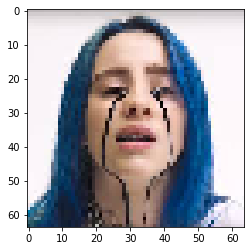

In [47]:
img_path = 'cry1.jpg'
img = image.load_img(img_path, target_size=(64, 64))
imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

print(happyModel.predict(x))